In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Reading the original dataset
data = pd.read_csv('dataset/Pulsar_cleaned.csv')

# Splitting data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Balancing the dataset
class_0 = data[data.Class == 0]
class_1 = data[data.Class == 1]
class_0_downsampled = class_0.sample(len(class_1), random_state=42)
balanced_data = pd.concat([class_0_downsampled, class_1], axis=0)

# Splitting balanced dataset into training and test sets
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initializing the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the balanced dataset
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Calculating metrics for the training set
train_accuracy_balanced = accuracy_score(y_train, y_train_pred)
train_recall_balanced = recall_score(y_train, y_train_pred)
train_precision_balanced = precision_score(y_train, y_train_pred)
train_f1_balanced = f1_score(y_train, y_train_pred)

# Calculating metrics for the test set
test_accuracy_balanced = accuracy_score(y_test, y_test_pred)
test_recall_balanced = recall_score(y_test, y_test_pred)
test_precision_balanced = precision_score(y_test, y_test_pred)
test_f1_balanced = f1_score(y_test, y_test_pred)

# Reading the combined dataset (original + synthetic data)
combined_data = pd.read_csv('dataset/combined_data.csv')

# Splitting data into features and target for combined dataset
X_combined = combined_data.drop('Class', axis=1)
y_combined = combined_data['Class']

# Balancing the combined dataset
class_0 = combined_data[combined_data.Class == 0]
class_1 = combined_data[combined_data.Class == 1]
class_0_downsampled = class_0.sample(len(class_1), random_state=42)
balanced_combined_data = pd.concat([class_0_downsampled, class_1], axis=0)

# Splitting balanced combined dataset into training and test sets
test_size_combined = int(0.2 * len(combined_data))
X_test_combined = X_combined[:test_size_combined]
y_test_combined = y_combined[:test_size_combined]
X_train_combined = X_combined[test_size_combined:]
y_train_combined = y_combined[test_size_combined:]

# Initializing the Random Forest model for combined dataset
model_combined = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the combined balanced dataset
model_combined.fit(X_train_combined, y_train_combined)

# Predictions on the training set for combined dataset
y_train_combined_pred = model_combined.predict(X_train_combined)

# Predictions on the test set for combined dataset
y_test_combined_pred = model_combined.predict(X_test_combined)

# Calculating metrics for the training set of combined dataset
train_accuracy_combined = accuracy_score(y_train_combined, y_train_combined_pred)
train_recall_combined = recall_score(y_train_combined, y_train_combined_pred)
train_precision_combined = precision_score(y_train_combined, y_train_combined_pred)
train_f1_combined = f1_score(y_train_combined, y_train_combined_pred)

# Calculating metrics for the test set of combined dataset
test_accuracy_combined = accuracy_score(y_test_combined, y_test_combined_pred)
test_recall_combined = recall_score(y_test_combined, y_test_combined_pred)
test_precision_combined = precision_score(y_test_combined, y_test_combined_pred)
test_f1_combined = f1_score(y_test_combined, y_test_combined_pred)

# Displaying metrics for the original dataset
results_original = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy': [train_accuracy_balanced, test_accuracy_balanced],
    'Recall': [train_recall_balanced, test_recall_balanced],
    'Precision': [train_precision_balanced, test_precision_balanced],
    'F1-score': [train_f1_balanced, test_f1_balanced]
})

print("Results for the original dataset:")
print(results_original)

# Displaying metrics for the combined dataset
results_combined = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy': [train_accuracy_combined, test_accuracy_combined],
    'Recall': [train_recall_combined, test_recall_combined],
    'Precision': [train_precision_combined, test_precision_combined],
    'F1-score': [train_f1_combined, test_f1_combined]
})

print("Results for the combined dataset:")
print(results_combined)

Results for the original dataset:
    Dataset  Accuracy  Recall  Precision  F1-score
0  Training  1.000000     1.0   1.000000   1.00000
1      Test  0.790323     0.8   0.745763   0.77193
Results for the combined dataset:
    Dataset  Accuracy    Recall  Precision  F1-score
0  Training  1.000000  1.000000   1.000000  1.000000
1      Test  0.971479  0.359756   0.867647  0.508621


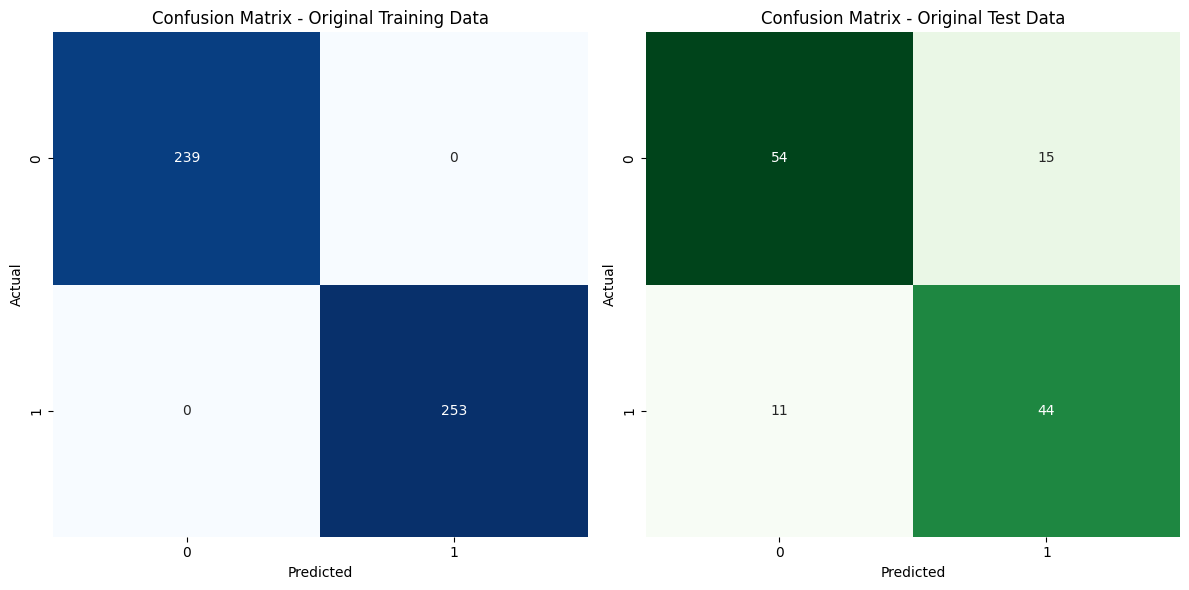

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_train_original = confusion_matrix(y_train, y_train_pred)
cm_test_original = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices for the original dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_original, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Original Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_original, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Original Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


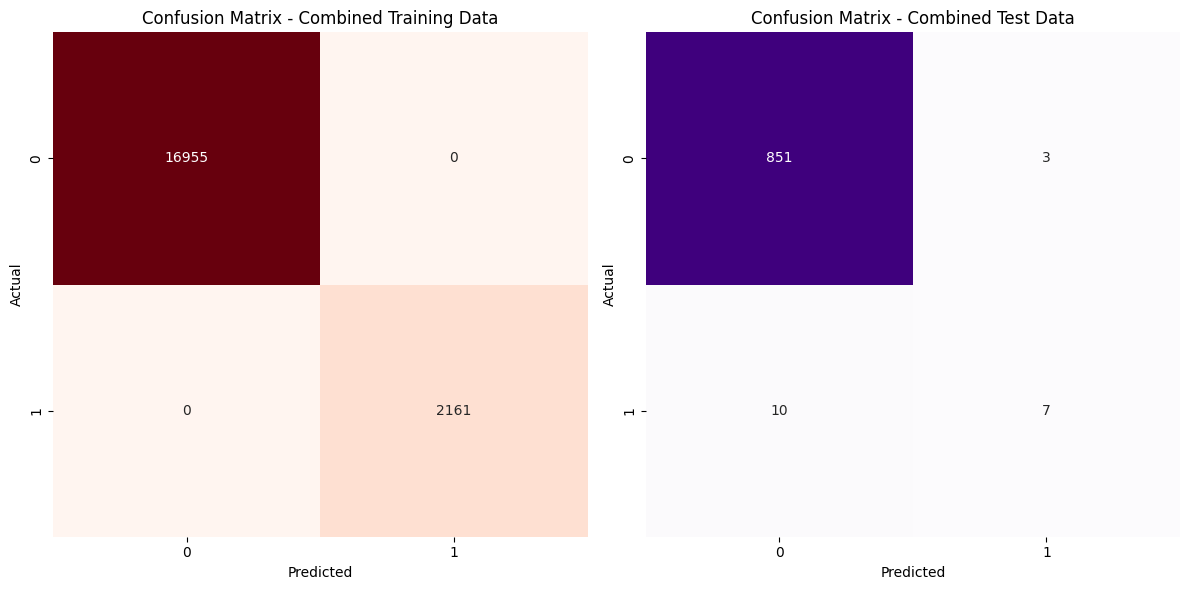

In [3]:
# Calculate confusion matrices for the combined dataset
cm_train_combined = confusion_matrix(y_train_combined, y_train_combined_pred)
cm_test_combined = confusion_matrix(y_test_combined, y_test_combined_pred)

# Plot confusion matrices for the combined dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_combined, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Combined Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_combined, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Combined Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


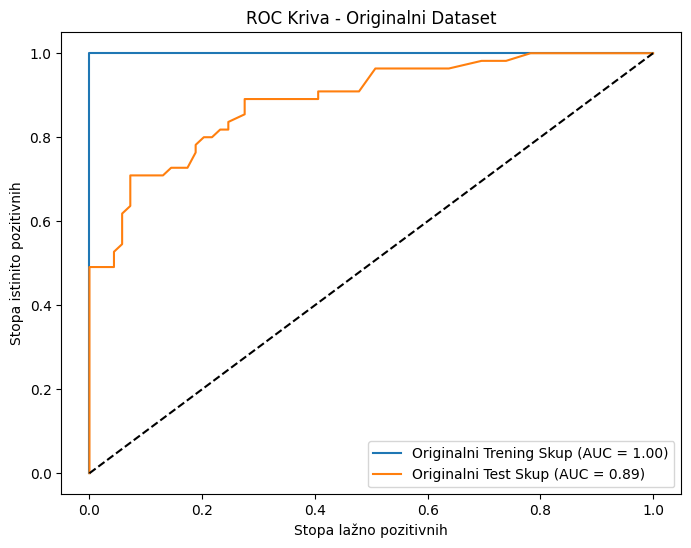

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Proračunavanje verovatnoća za originalni trening i test skup
y_train_probs_original = model.predict_proba(X_train)[:, 1]
y_test_probs_original = model.predict_proba(X_test)[:, 1]

# Proračunavanje vrednosti za ROC krivu za originalni trening i test skup
train_fpr_original, train_tpr_original, _ = roc_curve(y_train, y_train_probs_original)
test_fpr_original, test_tpr_original, _ = roc_curve(y_test, y_test_probs_original)

# Proračunavanje AUC vrednosti za originalni trening i test skup
train_auc_original = auc(train_fpr_original, train_tpr_original)
test_auc_original = auc(test_fpr_original, test_tpr_original)

# Prikaz ROC krive za originalni trening i test skup
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_original, train_tpr_original, label='Originalni Trening Skup (AUC = {:.2f})'.format(train_auc_original))
plt.plot(test_fpr_original, test_tpr_original, label='Originalni Test Skup (AUC = {:.2f})'.format(test_auc_original))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Stopa lažno pozitivnih')
plt.ylabel('Stopa istinito pozitivnih')
plt.title('ROC Kriva - Originalni Dataset')
plt.legend()
plt.show()


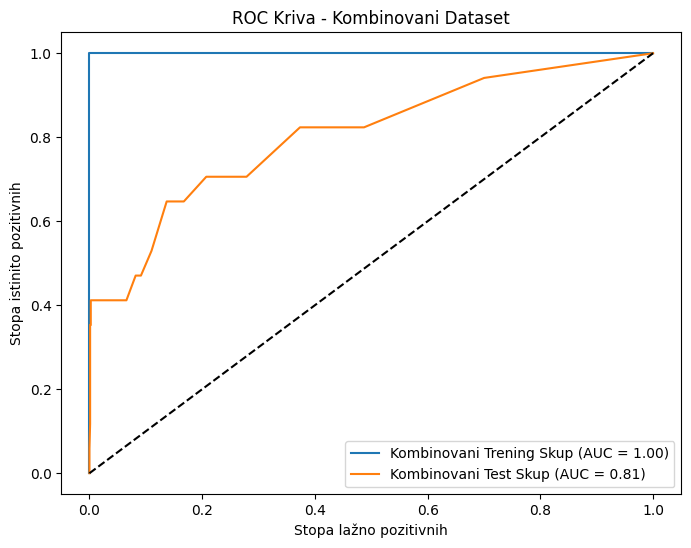

In [5]:
# Proračunavanje verovatnoća za kombinovani trening i test skup
y_train_probs_combined = model_combined.predict_proba(X_train_combined)[:, 1]
y_test_probs_combined = model_combined.predict_proba(X_test_combined)[:, 1]

# Proračunavanje vrednosti za ROC krivu za kombinovani trening i test skup
train_fpr_combined, train_tpr_combined, _ = roc_curve(y_train_combined, y_train_probs_combined)
test_fpr_combined, test_tpr_combined, _ = roc_curve(y_test_combined, y_test_probs_combined)

# Proračunavanje AUC vrednosti za kombinovani trening i test skup
train_auc_combined = auc(train_fpr_combined, train_tpr_combined)
test_auc_combined = auc(test_fpr_combined, test_tpr_combined)

# Prikaz ROC krive za kombinovani trening i test skup
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_combined, train_tpr_combined, label='Kombinovani Trening Skup (AUC = {:.2f})'.format(train_auc_combined))
plt.plot(test_fpr_combined, test_tpr_combined, label='Kombinovani Test Skup (AUC = {:.2f})'.format(test_auc_combined))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Stopa lažno pozitivnih')
plt.ylabel('Stopa istinito pozitivnih')
plt.title('ROC Kriva - Kombinovani Dataset')
plt.legend()
plt.show()
